<a href="https://colab.research.google.com/github/kweteM/MyColabProject2/blob/main/Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [22]:
# Deep learning framework used for building the neural network.
import tensorflow as tf

# A high-level API within TensorFlow for easy model creation.
from tensorflow import keras

# A library to provide numerical computing support.
import numpy as np

**2. Load Dataset**

The MNIST dataset consists of 70,000 grayscale images (28×28 pixels) of handwritten digits (0-9)

In [24]:
# Load MNIST dataset from keras API
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

**3. Data Inspecting**

In [25]:
# Check the length of X_train data
len(X_train) # 60,000 training images (X_train) with labels (y_train).

60000

In [26]:
# Check the length of X_test data
len(X_test) # 10,000 testing images (X_test) with labels (y_test).

10000

In [27]:
# Check the shape of X_train data
X_train[0].shape

(28, 28)

In [28]:
# Check the shape of X_test data
X_test[0].shape

(28, 28)

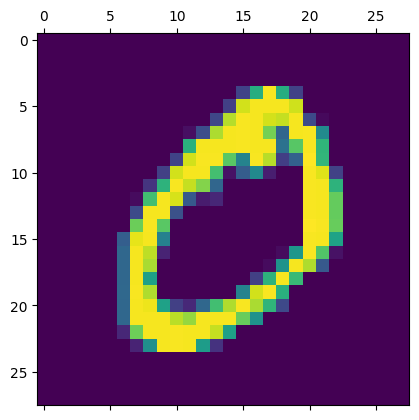

In [29]:
import matplotlib.pyplot as plt

# Check digit is position 1
plt.matshow(X_train[1])

In [30]:
y_train[1]

0

**4. Data Normalization**

* Pixel values in images range from 0 to 255 (grayscale).
* Normalization (scaling between 0 and 1) helps improve model performance and speeds up training.

In [31]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
# Check digit zero after normalization
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**5. Data Reshaping**

* The CNN requires 4D input: (batch_size, height, width, channels).
* -1 automatically calculates the batch size.
* 28x28 is the image size.
* 1 represents one color channel (grayscale).

In [33]:
# Reshape data for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

**6. CNN Model Definition**

* First Convolutional Layer (Conv2D)
* First MaxPooling Layer (MaxPooling2D)
* Second Convolutional Layer (Conv2D)
* Second MaxPooling Layer (MaxPooling2D)
* Flatten Layer
* Fully Connected Dense Layer
* Dropout Layer
* Output Layer

In [34]:
# Define an improved CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # Applies 32 filters of size 3×3 to detect features. Uses ReLU activation (relu) for non-linearity. input_shape=(28,28,1): Specifies the input size.
    keras.layers.MaxPooling2D(2,2),                    # Reduces image size using 2×2 pooling (downsampling). Extracts the most important features.
    keras.layers.Conv2D(64, (3,3), activation='relu'), # Applies 64 filters of size 3×3 for deeper feature extraction.
    keras.layers.MaxPooling2D(2,2),                    # Further reduces dimensions.
    keras.layers.Flatten(),                            # Converts the 2D feature maps into a 1D array for the fully connected layers.
    keras.layers.Dense(128, activation='relu'),        # Contains 128 neurons with ReLU activation for decision-making.
    keras.layers.Dropout(0.3),                         # Prevents overfitting by randomly setting 30% of neurons to zero during training.
    keras.layers.Dense(10, activation='softmax')       # 10 neurons (one for each digit 0-9). Softmax activation outputs probabilities for each class.
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**7. Model Compiling**

In [35]:
# Compile model
model.compile(optimizer='adam',                          # Adaptive optimization algorithm for better performance.
              loss='sparse_categorical_crossentropy',    # Suitable for multi-class classification.
              metrics=['accuracy'])                      # Tracks accuracy during training.

**8. Model Traning**

* epochs=10: The model goes through the training data 10 times.
* validation_data=(X_test, y_test): Evaluates performance after each epoch.

In [36]:
# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8867 - loss: 0.3678 - val_accuracy: 0.9851 - val_loss: 0.0460
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9816 - loss: 0.0614 - val_accuracy: 0.9872 - val_loss: 0.0365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9888 - val_loss: 0.0344
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9907 - loss: 0.0297 - val_accuracy: 0.9902 - val_loss: 0.0327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.9916 - val_loss: 0.0257
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9943 - loss: 0.0186 - val_accuracy: 0.9915 - val_loss: 0.0258
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9916 - val_loss: 0.0278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9950 -

**9. Model Evaluation**

Computes the final accuracy and loss on the test dataset.

In [37]:
# Evaluate model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9904 - loss: 0.0323


[0.028130466118454933, 0.9926999807357788]

**10. Generating the Confusion Matrix**

* confusion_matrix(y_test, y_pred_classes): Computes the confusion matrix, which shows how many times each digit was correctly or incorrectly classified.

* sns.heatmap(): Visualizes the confusion matrix using colors (darker blue means higher counts).

* The labels on the x-axis are the predicted digits, and those on the y-axis are the actual digits.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


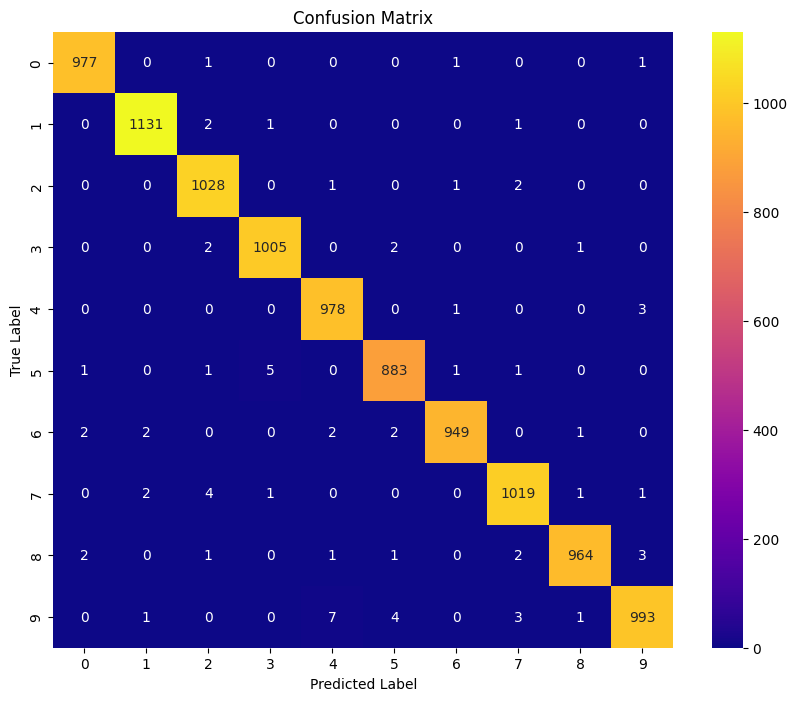

In [39]:
# Library used for visualizing images.
from sklearn.metrics import confusion_matrix

# Predict values
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**11. Printing the Classification Report**

classification_report(y_test, y_pred_classes) prints:
* Precision: How many predicted digits were correct.
* Recall: How many actual digits were correctly predicted.
* F1-score: Balance between precision and recall.

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Print classification report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

